In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\MSC BDA\Aman Sir\human_vital_signs_dataset_2024.csv')

In [3]:
df

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200015,200016,87,17,2024-03-03 00:18:46.246950,37.058905,95.357470,120,84,75,Male,63.496314,1.848268,0.129698,36,18.587394,96.000000,Low Risk
200016,200017,76,16,2024-03-03 00:17:46.246950,36.463631,99.340786,131,89,76,Male,99.384322,1.988074,0.061232,42,25.145064,103.000000,Low Risk
200017,200018,81,13,2024-03-03 00:16:46.246950,36.665477,98.120530,124,89,18,Female,71.771830,1.918059,0.097381,35,19.508780,100.666667,Low Risk
200018,200019,83,13,2024-03-03 00:15:46.246950,37.019873,95.362426,125,86,66,Female,60.220388,1.861655,0.068300,39,17.375810,99.000000,High Risk


In [4]:
df.isnull().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

In [5]:
df.columns

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')

In [6]:
require_subset = df[['Patient ID', 'Heart Rate','Oxygen Saturation','Systolic Blood Pressure',
       'Diastolic Blood Pressure']].copy()

In [7]:
require_subset.head()

,Patient ID,Heart Rate,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,60,95.702046,124,86
1,2,63,96.689413,126,84
2,3,63,98.508265,131,78
3,4,99,95.011801,118,72
4,5,69,98.623792,138,76


In [8]:
require_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Oxygen Saturation         200020 non-null  float64
 3   Systolic Blood Pressure   200020 non-null  int64  
 4   Diastolic Blood Pressure  200020 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 7.6 MB


In [9]:
require_subset.rename(columns={'Oxygen Saturation':'spo2'},inplace=True)

In [10]:
require_subset.describe()

,Patient ID,Heart Rate,spo2,Systolic Blood Pressure,Diastolic Blood Pressure
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,100010.500000,79.533747,97.504372,124.437971,79.499625
std,57740.944759,11.552894,1.442598,8.656946,5.757248
min,1.000000,60.000000,95.000007,110.000000,70.000000
25%,50005.750000,70.000000,96.256859,117.000000,75.000000
50%,100010.500000,80.000000,97.509629,124.000000,79.000000
75%,150015.250000,90.000000,98.755722,132.000000,84.000000
max,200020.000000,99.000000,99.999963,139.000000,89.000000


In [11]:
#coefficient of variation
#cv=std/mean
for cols in require_subset.columns:

    col_mean = require_subset[cols].mean()
    col_std = require_subset[cols].std()
    cv = col_std / col_mean

    if cv < 0.15:
        cv_check = "Low"
    elif cv < 0.30:
        cv_check = "Moderate"
    else:
        cv_check = "High"

    print(f"{cols:30s}: {cv:.3f} ({cv_check} variability)")


Patient ID                    : 0.577 (High variability)
Heart Rate                    : 0.145 (Low variability)
spo2                          : 0.015 (Low variability)
Systolic Blood Pressure       : 0.070 (Low variability)
Diastolic Blood Pressure      : 0.072 (Low variability)


 A lower CV indicates higher consistency (less variability) relative to the mean, while a higher CV indicates greater dispersion.

In [12]:
from scipy import stats
from scipy.stats import shapiro

for cols in require_subset.columns:
    data = require_subset[cols].dropna()    
    # Skewness & Kurtosis (per column)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    # Normality Test (Shapiro-Wilk)
    sample = data.sample(min(5000, len(data)), random_state=42)
    _, p_shapiro = shapiro(sample)
    print(f"  Skewness: {skew:.3f} ({'Symmetric' if abs(skew) < 0.5 else 'Skewed'})")
    print(f"  Kurtosis: {kurt:.3f} ({'Platykurtic' if abs(kurt) < 0.5 else 'Leptokurtic'})")
    print(f"  Normality (Shapiro p): {p_shapiro:.4f} -> {'NORMAL' if p_shapiro > 0.05 else 'NON-NORMAL'}")

  Skewness: 0.000 (Symmetric)
  Kurtosis: -1.200 (Leptokurtic)
  Normality (Shapiro p): 0.0000 -> NON-NORMAL
  Skewness: -0.002 (Symmetric)
  Kurtosis: -1.202 (Leptokurtic)
  Normality (Shapiro p): 0.0000 -> NON-NORMAL
  Skewness: -0.004 (Symmetric)
  Kurtosis: -1.198 (Leptokurtic)
  Normality (Shapiro p): 0.0000 -> NON-NORMAL
  Skewness: 0.007 (Symmetric)
  Kurtosis: -1.204 (Leptokurtic)
  Normality (Shapiro p): 0.0000 -> NON-NORMAL
  Skewness: 0.002 (Symmetric)
  Kurtosis: -1.204 (Leptokurtic)
  Normality (Shapiro p): 0.0000 -> NON-NORMAL


<AxesSubplot:>

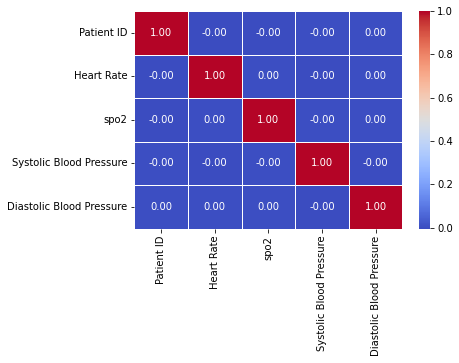

In [13]:
import seaborn as sns
corr_matrix = require_subset.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)



No Strong Correlation

In [14]:
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [15]:
OUTPUT_FILE = r'C:\Users\HP\OneDrive\Desktop\MSC BDA\Aman Sir\smart_ambulance_synthetic_data.csv'

In [16]:
columns = {
    'hr': 'Heart Rate',
    'sbp': 'Systolic Blood Pressure',
    'dbp': 'Diastolic Blood Pressure',
    'spo2': 'spo2'
}
stats_params = {
    key: {
        'mean': require_subset[col].mean(),
        'std': require_subset[col].std()
    }
    for key, col in columns.items()
}
print("Baselines Extracted:")
for key, values in stats_params.items():
    print(f"{key.upper()}: {values['mean']:.1f} ± {values['std']:.1f}")


Baselines Extracted:
HR: 79.5 ± 11.6
SBP: 124.4 ± 8.7
DBP: 79.5 ± 5.8
SPO2: 97.5 ± 1.4


In [17]:
import numpy as np

def get_patient_baseline(patient_type: str = "normal") -> dict:
    """
    Generate baseline physiological state based on patient condition.

    Supported types:
        - normal
        - stable
        - deteriorating
        - critical
    """

    config = {
        "normal": {
            "ranges": {
                "hr": (
                    stats_params["hr"]["mean"] - 5,
                    stats_params["hr"]["mean"] + 5
                ),
                "spo2": (
                    stats_params["spo2"]["mean"] - 1,
                    stats_params["spo2"]["mean"]
                ),
                "sbp": (
                    stats_params["sbp"]["mean"] - 5,
                    stats_params["sbp"]["mean"] + 5
                ),
                "dbp": (
                    stats_params["dbp"]["mean"] - 5,
                    stats_params["dbp"]["mean"] + 5
                ),
                "stress": (0.2, 0.4),
            },
            "var": 0.8,
            "rate": 0.0
        },

        "stable": {
            "ranges": {
                "hr": (75, 90),
                "spo2": (95, 98),
                "sbp": (115, 130),
                "dbp": (75, 85),
                "stress": (0.3, 0.5),
            },
            "var": 1.0,
            "rate": 0.0
        },

        "deteriorating": {
            "ranges": {
                "hr": (85, 100),
                "spo2": (92, 96),
                "sbp": (105, 120),
                "dbp": (65, 80),
                "stress": (0.5, 0.8),
            },
            "var": 1.2,
            "rate": 0.001   # gradual decline over time
        },

        "critical": {
            "ranges": {
                "hr": (100, 130),
                "spo2": (85, 93),
                "sbp": (85, 105),
                "dbp": (50, 70),
                "stress": (0.7, 1.0),
            },
            "var": 1.5,
            "rate": 0.003   # faster deterioration
        }
    }

    if patient_type not in config:
        raise ValueError(
            "Invalid patient_type. Choose from: normal, stable, deteriorating, critical"
        )

    patient_cfg = config[patient_type]

    # Generate baseline dynamically
    baseline = {
        key: np.random.uniform(*value)
        for key, value in patient_cfg["ranges"].items()
    }

    baseline["var"] = patient_cfg["var"]
    baseline["rate"] = patient_cfg["rate"]

    return baseline


In [18]:

def simulate_motion(duration: int, scenario: str = "urban") -> dict:
    """
    Simulate 3-axis acceleration and vibration intensity.

    Parameters:
        duration (int): Number of time steps
        scenario (str): 'urban', 'highway', or 'rural'

    Returns:
        dict: Acceleration components and vibration magnitude
    """

    if duration <= 0:
        raise ValueError("Duration must be a positive integer.")

    t = np.arange(duration)

    # Base road noise (sensor noise)
    road_noise = np.random.normal(0, 0.08, duration)

    # Scenario dynamics
    if scenario == "highway":
        speed_var = 0.1 * np.sin(2 * np.pi * t / 300)

    elif scenario == "rural":
        speed_var = road_noise.copy()
        bump_indices = np.random.choice(
            duration,
            size=max(1, duration // 30),
            replace=False
        )
        speed_var[bump_indices] += np.random.uniform(0.5, 1.5, size=len(bump_indices))

    elif scenario == "urban":
        speed_var = np.random.choice(
            [0.1, 0.5],
            size=duration,
            p=[0.3, 0.7]
        )

    else:
        raise ValueError("Invalid scenario. Choose: urban, highway, rural")

    # Acceleration components
    acc_x = 0.4 + speed_var + road_noise
    acc_y = np.random.normal(0, 0.1, duration)
    acc_z = np.random.normal(0.05, 0.05, duration)

    # Vibration magnitude
    vibration = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

    return {
        "x": acc_x,
        "y": acc_y,
        "z": acc_z,
        "vib": vibration
    }

In [19]:
def generate_journey(
    patient_id: str,
    duration_min: int =  np.random.randint(30, 60),
    p_type: str = "normal",
    scenario: str = "urban"
) -> pd.DataFrame:
    """
    Simulates a patient transport journey with motion-influenced vitals.
    """

    secs = duration_min * 60
    base = get_patient_baseline(p_type)
    motion = simulate_motion(secs, scenario)

    start_ts = datetime.now() - timedelta(hours=np.random.randint(0, 24))
    deterioration_rate = base.get("rate", 0)

    records = []

    for i in range(secs):

        # Progressive deterioration
        deterioration = deterioration_rate * i

        # Stress influenced by vibration
        stress = base["stress"] + motion["vib"][i] * 0.1

        # -------------------------
        # Correlated physiological model
        # -------------------------

        hr = (
            base["hr"]
            + stress * 15
            - deterioration * 5
            + np.random.normal(0, base["var"])
        )

        spo2 = (
            base["spo2"]
            - stress * 2
            - deterioration * 10
            + np.random.normal(0, 0.2)
        )

        # Motion artifact drop
        if motion["vib"][i] > 1.2:
            spo2 -= np.random.uniform(0.5, 2.0)

        sbp = base["sbp"] + (hr - base["hr"]) * 0.3 + stress * 8
        dbp = min(base["dbp"] + stress * 4, sbp - 15)

        # -------------------------
        # Physiological bounds
        # -------------------------
        hr = np.clip(hr, 30, 220)
        spo2 = np.clip(spo2, 70, 100)
        sbp = np.clip(sbp, 70, 220)
        dbp = np.clip(dbp, 40, sbp - 5)

        records.append({
            "timestamp": start_ts + timedelta(seconds=i),
            "patient_id": patient_id,
            "heart_rate": round(hr, 1),
            "spo2": round(spo2, 2),
            "sbp": round(sbp, 1),
            "dbp": round(dbp, 1),
            "vibration": round(motion["vib"][i], 3),
            "patient_type": p_type,
            "route": scenario
        })

    return pd.DataFrame(records)

In [20]:
from datetime import timedelta

In [21]:
journey_list = []

patient_types = ['normal', 'critical', 'stable','deteriorating']
routes = ['urban', 'highway', 'rural']

for pid in range(1, 21):

    pt = np.random.choice(
        patient_types,
        p=[0.3, 0.3, 0.2, 0.2]   # Adjusted probabilities
    )

    rt = np.random.choice(routes)

    duration = np.random.randint(30, 60)
    print(f"Generated Patient {pid}: Duration {duration} mins")

    df_journey = generate_journey(
        patient_id=pid,
        duration_min=duration,
        p_type=pt,
        scenario=rt
    )

    journey_list.append(df_journey)


# Concatenate all journeys
final_df = pd.concat(journey_list, ignore_index=True)

# Save
final_df.to_csv(OUTPUT_FILE, index=False)

print(f"✓ Generation Complete: {len(final_df)} records saved to {OUTPUT_FILE}")

final_df.head()


Generated Patient 1: Duration 53 mins
Generated Patient 2: Duration 36 mins
Generated Patient 3: Duration 32 mins
Generated Patient 4: Duration 41 mins
Generated Patient 5: Duration 32 mins
Generated Patient 6: Duration 43 mins
Generated Patient 7: Duration 37 mins
Generated Patient 8: Duration 55 mins
Generated Patient 9: Duration 41 mins
Generated Patient 10: Duration 43 mins
Generated Patient 11: Duration 34 mins
Generated Patient 12: Duration 46 mins
Generated Patient 13: Duration 31 mins
Generated Patient 14: Duration 31 mins
Generated Patient 15: Duration 36 mins
Generated Patient 16: Duration 50 mins
Generated Patient 17: Duration 46 mins
Generated Patient 18: Duration 59 mins
Generated Patient 19: Duration 58 mins
Generated Patient 20: Duration 57 mins
✓ Generation Complete: 51660 records saved to C:\Users\HP\OneDrive\Desktop\MSC BDA\Aman Sir\smart_ambulance_synthetic_data.csv


,timestamp,patient_id,heart_rate,spo2,sbp,dbp,vibration,patient_type,route
0,2026-02-13 12:16:03.410581,1,87.9,94.70,133.2,78.3,0.422,stable,urban
1,2026-02-13 12:16:04.410581,1,88.9,94.84,133.7,78.5,0.721,stable,urban
2,2026-02-13 12:16:05.410581,1,88.4,94.74,133.5,78.4,0.585,stable,urban
3,2026-02-13 12:16:06.410581,1,87.9,94.67,133.2,78.3,0.419,stable,urban
4,2026-02-13 12:16:07.410581,1,90.1,94.36,134.3,78.5,0.934,stable,urban


# Documentation: Assumptions, Signal Meanings, and Limitations

## 1. Assumptions
- **Baseline Vitals**: Patient baselines are derived from statistical averages (mean/std) of the `human_vital_signs_dataset_2024.csv`. We assume this dataset is representative of the general population.
- **Patient Types**: Patients are categorized into four types: 'normal', 'stable', 'deteriorating', and 'critical'. Each type has defined ranges for vitals and stress levels.
- **Motion Simulation**: Motion is simulated based on three scenarios: 'urban', 'highway', and 'rural'. We assume these scenarios cover the typical transport conditions for an ambulance.
- **Stress Influence**: We assume that vibration and patient condition directly influence 'stress', which in turn affects heart rate, blood pressure, and SpO2.
- **Linear Deterioration**: For 'deteriorating' and 'critical' patients, health metrics are assumed to deteriorate linearly over time (`deterioration_rate * i`).

## 2. Signal Meanings
- **Heart Rate (HR)**: Beats per minute. Influenced by baseline condition, stress, and deterioration.
- **SpO2**: Oxygen saturation percentage. Influenced by baseline, stress, deterioration, and motion artifacts (vibration > 1.2 triggers drops).
- **Systolic/Diastolic Blood Pressure (SBP/DBP)**: mmHg. SBP is correlated with HR and stress. DBP is derived from SBP and stress.
- **Vibration (Motion)**: Calculated magnitude of 3-axis acceleration (x, y, z). Represents the physical movement of the ambulance and patient.
- **Stress**: A derived internal metric (0.0 - 1.0) representing the physiological stress load on the patient.

## 3. Limitations
- **Simplified Physiology**: The relationships between vitals (e.g., HR increasing SBP) are modeled using simple linear equations and may not capture complex non-linear physiological responses.
- **Synthetic Noise**: Road noise and motion artifacts are generated using random distributions (Gaussian/Uniform) and may not perfectly reflect real-time sensor noise characteristics.
- **Discrete Scenarios**: Journey routes are fixed to single scenarios ('urban' OR 'highway') for the entire duration, whereas real journeys often involve a mix.
- **Univariate Deterioration**: Deterioration is modeled as a constant rate, whereas real medical emergencies can have sudden, non-linear crash events.
- **Duration**: Journeys are simulated for short durations (30-60 mins), which may not cover long-distance transfer dynamics.
